In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,boxcox
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df=pd.read_csv("winequality-RED.csv")

In [3]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,density,chlorides,quality
0,9.4,0.70,0.56,0.00,0.9978,0.076,5
1,9.8,0.88,0.68,0.00,0.9968,0.098,5
2,9.8,0.76,0.65,0.04,0.9970,0.092,5
3,9.4,0.70,0.56,0.00,0.9978,0.076,5
4,9.4,0.66,0.56,0.00,0.9978,0.075,5


In [4]:
df.shape

(880, 7)

In [5]:
df.sample(10)

,alcohol,volatile acidity,sulphates,citric acid,density,chlorides,quality
101,9.4,0.670,0.62,0.55,0.99680,NaN,5
125,9.3,0.610,0.58,0.20,0.99710,0.077,5
245,11.7,0.400,0.82,0.53,0.99860,0.097,7
509,10.4,0.420,0.44,0.32,0.99628,0.067,5
303,9.1,0.410,0.64,0.49,0.99800,0.088,5
156,11.0,0.520,0.50,0.25,0.99685,0.081,5
218,11.7,0.420,0.75,0.66,0.99700,0.116,7
228,9.9,0.765,0.78,0.02,0.99750,0.063,5
729,9.2,0.620,0.61,0.10,0.99600,0.071,5
279,10.2,0.680,0.60,0.24,0.99880,0.087,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           880 non-null    float64
 1   volatile acidity  880 non-null    float64
 2   sulphates         880 non-null    float64
 3   citric acid       880 non-null    float64
 4   density           872 non-null    float64
 5   chlorides         866 non-null    float64
 6   quality           880 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 48.2 KB


In [47]:
df.describe()

,alcohol,volatile acidity,sulphates,citric acid,density,chlorides,quality
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,10.253883,0.537892,0.648170,0.273420,0.996871,0.088968,5.452273
std,1.028517,0.176103,0.171221,0.191338,0.001780,0.049441,0.837133
min,8.500000,0.120000,0.370000,0.000000,0.990640,0.012000,5.000000
25%,9.500000,0.400000,0.540000,0.100000,0.995840,0.071000,5.000000
50%,9.900000,0.540000,0.610000,0.260000,0.996845,0.080000,5.000000
75%,10.900000,0.650000,0.720000,0.420000,0.997823,0.092000,5.000000
max,14.900000,1.330000,1.980000,0.790000,1.003200,0.611000,7.000000


In [7]:
missing_values_count=df.isnull().sum()
missing_values_count

alcohol              0
volatile acidity     0
sulphates            0
citric acid          0
density              8
chlorides           14
quality              0
dtype: int64

Text(0.5, 1.0, 'Missing Values heatmap')

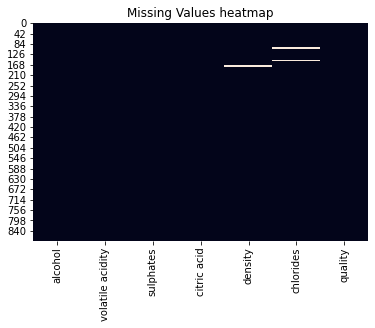

In [8]:
#To check the values missing in each column.

sns.heatmap(df.isna(),cbar=False).set_title("Missing Values heatmap")

In [9]:
df.nunique()

alcohol              52
volatile acidity    123
sulphates            86
citric acid          74
density             298
chlorides           122
quality               2
dtype: int64

In [10]:
# how many total missing values do we have?

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()


# percent of data that is missing

percent_missing = (total_missing/total_cells) * 100
print("Shape of Data is:",df.shape)
print("Total cells present in  tha data is:",total_cells)
print("Missing Data in the dataset:",total_missing)
print("Total percentage of missing datas:",percent_missing)


Shape of Data is: (880, 7)
Total cells present in  tha data is: 6160
Missing Data in the dataset: 22
Total percentage of missing datas: 0.35714285714285715


In [11]:
#Missing data of density column
df[df.density.isna()]

,alcohol,volatile acidity,sulphates,citric acid,density,chlorides,quality
171,9.3,0.330,0.65,0.23,NaN,0.077,5
172,10.0,0.520,0.57,0.03,NaN,0.070,5
173,9.3,0.370,0.67,0.23,NaN,0.077,5
174,10.9,0.560,0.87,0.49,NaN,0.064,5
175,10.2,0.260,0.72,0.52,NaN,0.071,7
176,10.1,0.370,0.78,0.58,NaN,0.071,5
177,9.4,0.715,0.64,0.20,NaN,0.076,5
178,9.4,0.650,0.77,0.18,NaN,0.088,5


In [12]:
#Missing data of chlorides column
df[df.chlorides.isna()]

,alcohol,volatile acidity,sulphates,citric acid,density,chlorides,quality
98,9.6,0.745,0.82,0.11,0.99650,NaN,5
99,9.5,0.715,0.77,0.15,0.99680,NaN,5
100,9.4,0.390,0.58,0.08,0.99540,NaN,5
101,9.4,0.670,0.62,0.55,0.99680,NaN,5
102,10.0,0.680,0.52,0.02,0.99440,NaN,5
103,9.3,0.490,0.80,0.26,0.99680,NaN,5
104,10.1,0.600,0.54,0.03,0.99500,NaN,5
105,10.1,0.600,0.54,0.03,0.99500,NaN,5
106,10.5,0.430,0.72,0.42,0.99730,NaN,5
151,9.7,0.490,0.54,0.19,0.99570,NaN,5


In [13]:
df['density'] = df['density'].fillna(df['density'].mean())

In [14]:
df.density.isnull().sum()

0

In [15]:
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())

In [16]:
df.chlorides.isnull().sum()

0

In [17]:
df.isnull().sum()

alcohol             0
volatile acidity    0
sulphates           0
citric acid         0
density             0
chlorides           0
quality             0
dtype: int64

In [18]:
df.to_csv('df.csv', index = False)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

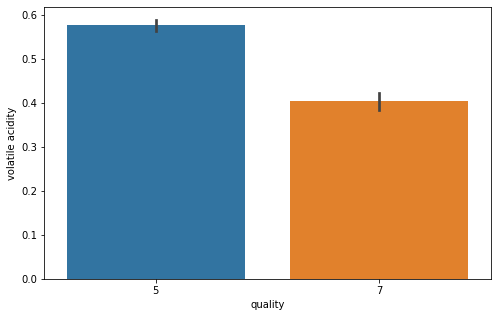

In [19]:
#Composition of volatile acidity also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

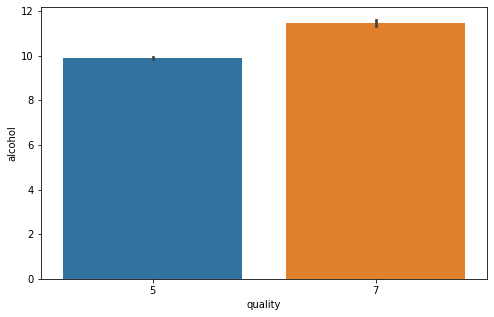

In [20]:
#Alcohol level also goes higher as te quality of wine increases

fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

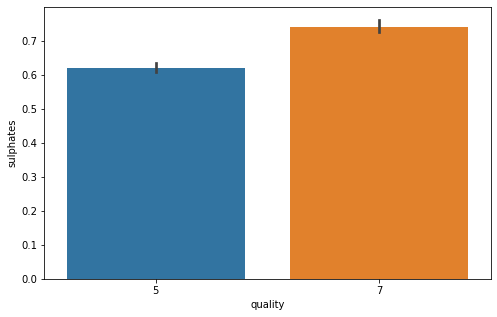

In [21]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

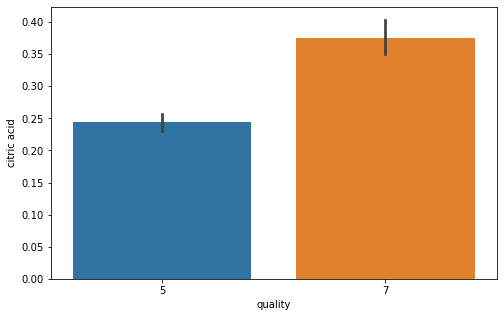

In [22]:
#Citric Acid level goes higher with the quality of wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

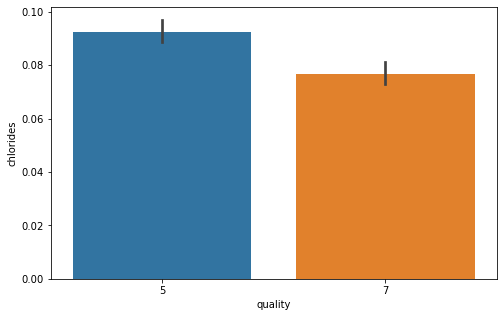

In [23]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

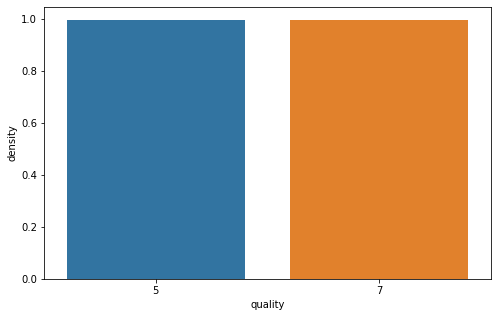

In [24]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'density', data = df)

In [25]:
df['quality'].value_counts()

5    681
7    199
Name: quality, dtype: int64

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

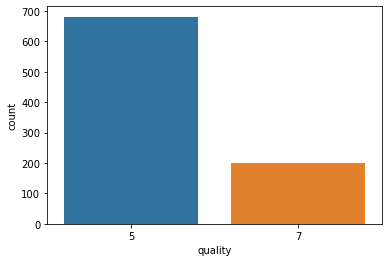

In [26]:
sns.countplot(df['quality'])

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

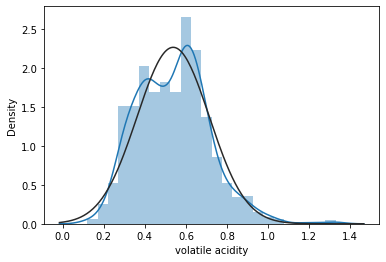

In [27]:
from scipy import stats
sns.distplot(df['volatile acidity'],fit = norm)

In [30]:
#Now seperate the dataset as response variable and feature variables

X = df.drop('quality', axis = 1)
y = df['quality']

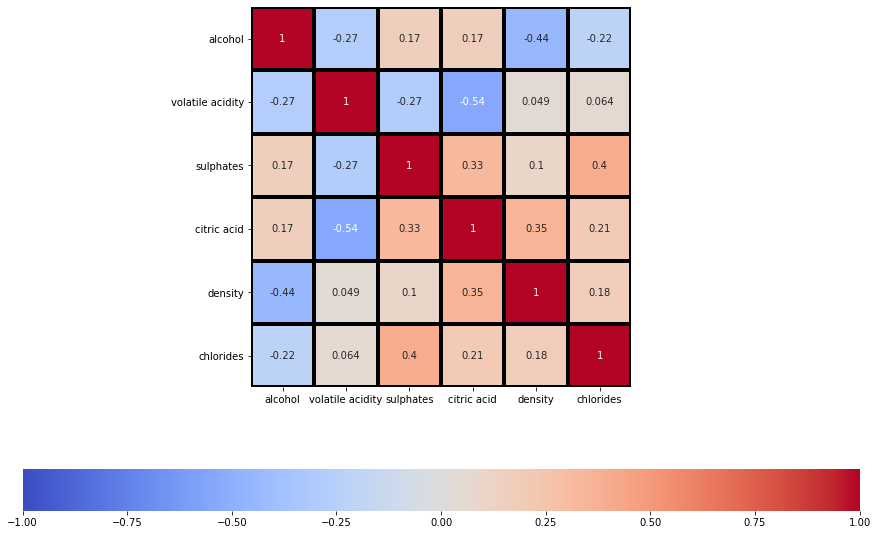

In [31]:
#To check the correlation between the variables

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(X.corr() ,annot=True ,fmt='.2g', vmax=1,vmin=-1,center=0, cmap="coolwarm",linewidths=3,linecolor='black' , cbar_kws= {'orientation': 'horizontal'} ,square=True,ax=ax)
plt.show()

In [32]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  ##removing multicollinear variables

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [35]:
calculate_vif_(X)

dropping 'density' at index: 4
dropping 'alcohol' at index: 0
dropping 'sulphates' at index: 1
Remaining variables:
Index(['volatile acidity', 'citric acid', 'chlorides'], dtype='object')


,volatile acidity,citric acid,chlorides
0,0.700,0.00,0.076
1,0.880,0.00,0.098
2,0.760,0.04,0.092
3,0.700,0.00,0.076
4,0.660,0.00,0.075
...,...,...,...
875,0.460,0.29,0.074
876,0.320,0.44,0.061
877,0.725,0.20,0.073
878,0.600,0.08,0.090


In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
 # Tree model using criterion
    
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8522727272727273


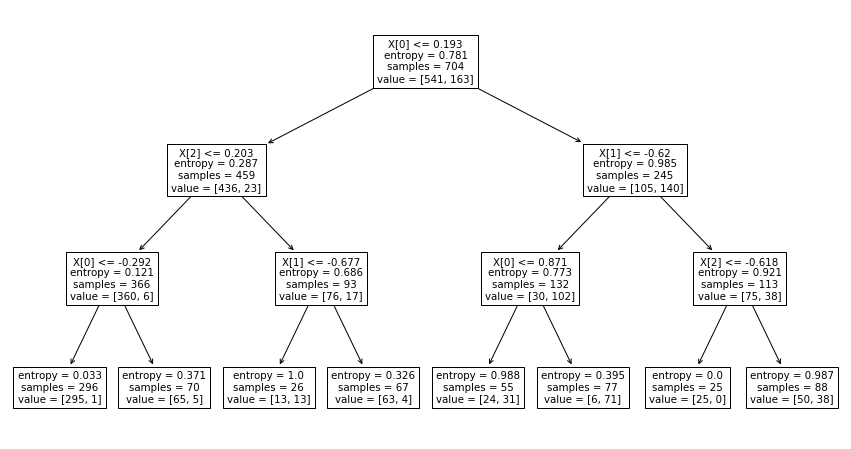

In [38]:
plt.figure(figsize = (15, 8))
tree.plot_tree(model);
plt.axis('off');
plt.show();

In [39]:
print(confusion_matrix(y_test, y_pred))

[[131   9]
 [ 17  19]]


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.89      0.94      0.91       140
           7       0.68      0.53      0.59        36

    accuracy                           0.85       176
   macro avg       0.78      0.73      0.75       176
weighted avg       0.84      0.85      0.85       176



In [41]:
#Finding best parameters for our tree model
param = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6,7,8,9,10]
    
}
grid_model = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=10)

In [42]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [43]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [44]:
 # Tree model using criterion
    
model = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8977272727272727


#### Tree Model improves from 85% to 89% using Grid Search CV

In [45]:
#Now lets try to do some evaluation for tree model using cross validation.
tree_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
tree_eval.mean()

0.8763983903420524

#### Tree Model accuracy increases from 85% to 87 % using cross validation score

In [46]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8428571428571429

Tree Model accuracy does not enhance  using auc score.

Conclusion: After removing multcollinearity we got to know about the important variables which contribute the most in the quality of the wine prediction are volatile acidity, citric acid	chlorides.Tree model provided the accuracy of 89% after hypertuning the model. 